In [2]:
print("sample test in iris Dataset")

sample test in iris Dataset


In [2]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))

# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))

# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.9.6 (default, Mar 12 2025, 20:22:46) 
[Clang 17.0.0 (clang-1700.0.13.3)]
scipy: 1.13.1
numpy: 2.0.2
matplotlib: 3.9.4
pandas: 2.3.0+4.g1dfc98e16a
sklearn: 1.6.1


In [3]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [5]:
print(dataset.shape)


(150, 5)


In [6]:
print(dataset.head(30))


    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [7]:
print(dataset.head(100))

    sepal-length  sepal-width  petal-length  petal-width            class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


In [8]:
print(dataset.describe)

<bound method NDFrame.describe of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [9]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


sepal-length       Axes(0.125,0.53;0.352273x0.35)
sepal-width     Axes(0.547727,0.53;0.352273x0.35)
petal-length       Axes(0.125,0.11;0.352273x0.35)
petal-width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

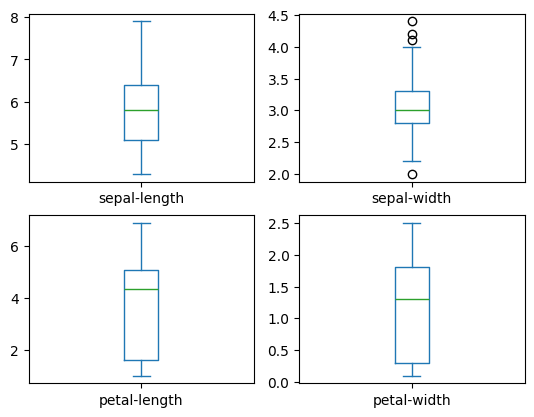

In [10]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

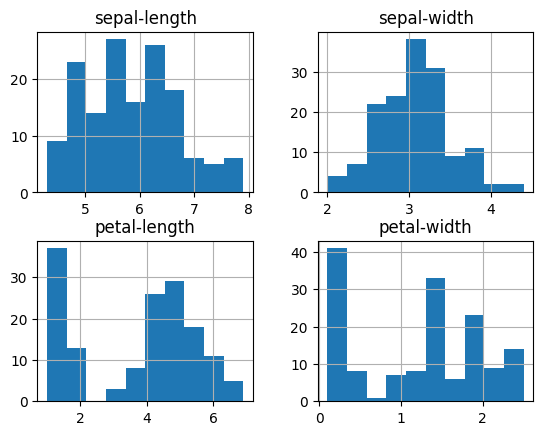

In [11]:
dataset.hist()

array([[<Axes: xlabel='sepal-length', ylabel='sepal-length'>,
        <Axes: xlabel='sepal-width', ylabel='sepal-length'>,
        <Axes: xlabel='petal-length', ylabel='sepal-length'>,
        <Axes: xlabel='petal-width', ylabel='sepal-length'>],
       [<Axes: xlabel='sepal-length', ylabel='sepal-width'>,
        <Axes: xlabel='sepal-width', ylabel='sepal-width'>,
        <Axes: xlabel='petal-length', ylabel='sepal-width'>,
        <Axes: xlabel='petal-width', ylabel='sepal-width'>],
       [<Axes: xlabel='sepal-length', ylabel='petal-length'>,
        <Axes: xlabel='sepal-width', ylabel='petal-length'>,
        <Axes: xlabel='petal-length', ylabel='petal-length'>,
        <Axes: xlabel='petal-width', ylabel='petal-length'>],
       [<Axes: xlabel='sepal-length', ylabel='petal-width'>,
        <Axes: xlabel='sepal-width', ylabel='petal-width'>,
        <Axes: xlabel='petal-length', ylabel='petal-width'>,
        <Axes: xlabel='petal-width', ylabel='petal-width'>]], dtype=object)

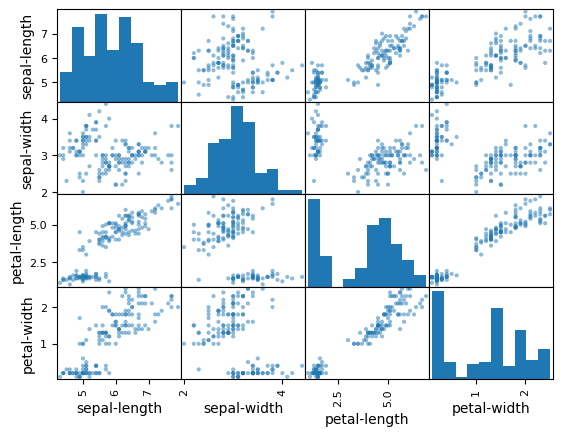

In [12]:
scatter_matrix(dataset)

In [13]:
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.20
seed = 6

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [14]:
seed = 6
scoring = 'accuracy'


In [15]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)


In [ ]:
print("this is the basic evaluation of training and testing of machine learning using k fold cross validation")